In [1]:
import fastai
from fastai import *
from fastai.vision import *
import torch
print(torch.__version__)
print(fastai.__version__)

1.4.0
1.0.60


# 4.3 fastai
## 4.3.1 fastai介绍
### fastai库
fastai将训练一个准确的神经网络变得十分简单。fastai库是基于他的创始人Jeremy Howard 等人开发的 Deep Learning 课程深度学习的研究，为计算机视觉、文本、表格数据、时间序列、协同过滤等常见深度学习应用提供单一、一致界面的深度学习库，可以做到开箱即用。这意味着，如果你已经学会用fastai创建实用的计算机视觉（CV）模型，那你就可以用同样的方法创建自然语言处理（NLP）模型，或是其他模型。

fastai 是目前把易用性和功能都做到了极致的深度学习框架，正如Jeremy所说的：如果一个深度学习框架需要写个教程给你，那它的易用性还不够好。Jeremy 说这话，不是为了夸自己，因为他甚至做了个 MOOC 出来。他自己评价说目前 fastai 的易用性依然不算成功。但在我看来它的门槛极低，你可以很轻易用几句话写个图片分类模型出来，人人都能立即上手，你甚至不需要知道深度学习的理论。


### fast.ai课程

上面说到了课程，这里对fast.ai的课程做一个简单的介绍：
课程是由kaggle赛事老司机，连续两年冠军Jeremy Howard 和 Rachel Tomas 联合创办，旨在让更多人能接受深度学习的课程，而且是完全免费！真的是业界良心，这两年深度学习火了起来，国内有培训机构推出收费课程了，教学水平参差不齐。而Jeremy和Rachel推出的课程，恰恰提现了他们的教育理念：`Make deep learning uncool ! （让深度学习变得没那么高大上）`
Fast.ai给人的印象一直很“接地气”：
- 研究如何快速、可靠地把最先进的深度学习应用于实际问题。
- 提供Fast.ai库，它不仅是让新手快速构建深度学习实现的工具包，也是提供最佳实践的一个强大而便捷的资源。
- 课程内容简洁易懂，以便尽可能多的人从研究成果和软件中收益。

### Github
这个官方的Github包含了fastai的所有内容 https://github.com/fastai 


## 4.3.2 fastai实践
### MNIST
我们还是以最简单的MNIST来入手看看fastai都为我们做了什么

In [2]:
# 使用fastai内置的MNIST数据集，这里会从fastai的服务器下载
path = untar_data(URLs.MNIST_SAMPLE)

URLs.MNIST_SAMPLE 只提供了3和7 两个分类的数据，这个是用来做演示的，我们正好也做个演示

这里如果下载很慢的话，那么我们可以手动进行操作（建议这样，比程序下载快很多而且稳定）
```
#进入我们用户目录，创建以下的目录
mkdir -p ~/.fastai/data
cd ~/.fastai/data
# 下载解压
wget -c http://files.fast.ai/data/examples/mnist_sample.tgz
tar -zxvf mnist_sample.tgz
```
完成后重新执行上面的命令即可

In [3]:
#使用ImageDataBunch从刚才的目录中将读入数据
data = ImageDataBunch.from_folder(path)


In [4]:
# 可以看一下data里面有什么？
data

ImageDataBunch;

Train: LabelList (12396 items)
x: ImageList
Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28)
y: CategoryList
3,3,3,3,3
Path: /home/ai/.fastai/data/mnist_sample;

Valid: LabelList (2038 items)
x: ImageList
Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28)
y: CategoryList
3,3,3,3,3
Path: /home/ai/.fastai/data/mnist_sample;

Test: None

In [5]:
# 使用cnn_learner来创建一个learn，这里模型我们选择resnet18，使用的计量方法是accuracy准确率
# learn =create_cnn(data, models.resnet18, metrics=accuracy)
learn = cnn_learner(data, models.resnet18, metrics=accuracy)

In [6]:
#可以直接使用train_ds来访问数据集里面的数据
img,label = data.train_ds[0]
print(label)
img

3


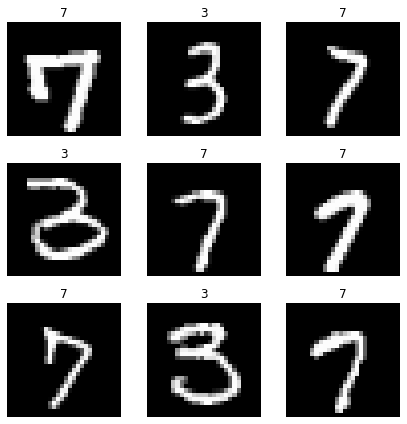

In [7]:
#或者我们直接使用show_batch方法，连标签都给我们自动生成好了
data.show_batch(rows=3, figsize=(6,6))

这里也是直接下载PyTorch官方提供的resnet18与训练模型

`wget -P /Users/tant/.torch/models/ https://download.pytorch.org/models/resnet18-5c106cde.pth`

In [8]:
# 使用learn的fit方法就可以进行训练了，训练一遍
learn.fit(10)

epoch,train_loss,valid_loss,accuracy,time
0,0.162899,0.099569,0.969087,00:03
1,0.091341,0.065295,0.978410,00:03
2,0.068317,0.056457,0.982336,00:03
3,0.048395,0.045760,0.983317,00:03
4,0.041155,0.039093,0.990186,00:03
5,0.031722,0.031642,0.989205,00:03
6,0.031164,0.025923,0.990186,00:03
7,0.023048,0.033711,0.990677,00:03
8,0.021399,0.023641,0.992640,00:03
9,0.019421,0.022063,0.993621,00:03


经过上面的训练，你一定会很纳闷：
- 没有告诉模型类别有几个
- 没有指定任务迁移之后接续的几个层次的数量、大小、激活函数
- 没有告诉网络损失函数是什么
我几乎没有提供任何的信息，网络就开始训练了？

对，不需要。

因为 fastai 根据你输入的上述“数据”、“模型结构”和“损失度量”信息，自动帮你把这些闲七杂八的事情默默搞定了。

下面再介绍一些训练的高级用法

In [9]:
#从新生成一个数据集
# learn2 =create_cnn(data, models.resnet18, metrics=accuracy,callback_fns=ShowGraph)
learn2 = cnn_learner(data, models.resnet18, metrics=accuracy,callback_fns=ShowGraph)

这里我们使用fit_one_cycle方法。

fit_one_cycle使用的是一种周期性学习率，从较小的学习率开始学习，缓慢提高至较高的学习率，然后再慢慢下降，周而复始，每个周期的长度略微缩短，在训练的最后部分，允许学习率比之前的最小值降得更低。这不仅可以加速训练，还有助于防止模型落入损失平面的陡峭区域，使模型更倾向于寻找更平坦的极小值，从而缓解过拟合现象。

epoch,train_loss,valid_loss,accuracy,time
0,0.210419,0.124807,0.956330,00:03


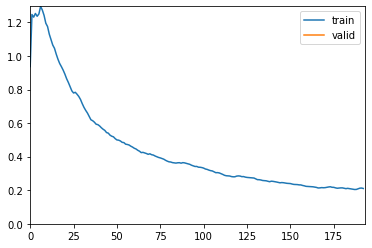

In [10]:
learn2.fit_one_cycle(1)

我们使用内置ShowGraph的方法直接打印训练的状态，如果我们需要更详细的状态，可以直接调用一下的方法：

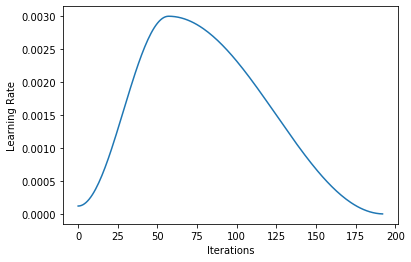

In [11]:
# 学习率的变更
learn2.recorder.plot_lr()

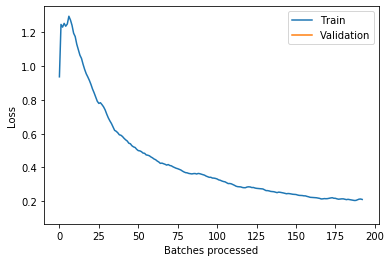

In [12]:
#损失
learn2.recorder.plot_losses()

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


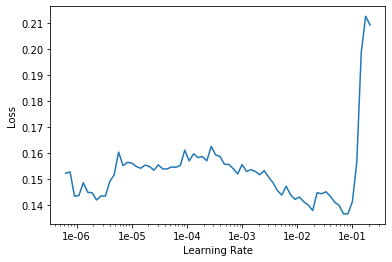

In [13]:
# 我们也可以使用lr_find()找到损失仍在明显改善最高学习率
learn2.lr_find()
learn2.recorder.plot()

## 4.3.3 fastai文档翻译
由于fastai的中文资料很少而且目前官方只提供英文的文档，所以如果谁有兴趣一起翻译的话可以联系我，如果人数够了的话可以组个团队一起翻译。

# My Trying

In [14]:
# Set batch_size of dataset, default is 64
data.batch_size = 2048

In [15]:
learn3 = cnn_learner(data, models.resnet18, metrics=accuracy,callback_fns=ShowGraph) 

epoch,train_loss,valid_loss,accuracy,time
0,0.131322,0.121788,0.957802,00:09
1,0.130826,0.120257,0.957311,00:02
2,0.132737,0.118983,0.957802,00:02
3,0.132466,0.117859,0.957802,00:02
4,0.131514,0.116641,0.959274,00:02
5,0.130831,0.115266,0.960746,00:02
6,0.130036,0.114039,0.960746,00:02
7,0.128472,0.112607,0.961237,00:02
8,0.126575,0.111044,0.962709,00:02
9,0.125637,0.109279,0.963199,00:02


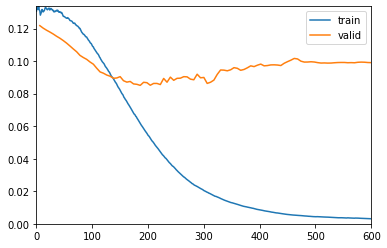

In [16]:
learn2.fit_one_cycle(100)

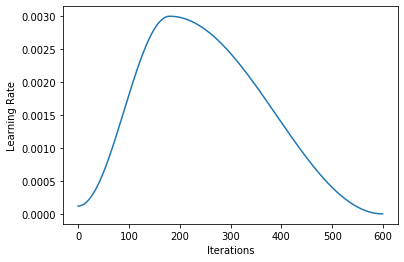

In [17]:
# 学习率的变更
learn2.recorder.plot_lr()

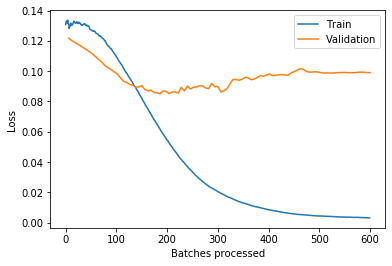

In [18]:
#损失
learn2.recorder.plot_losses()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


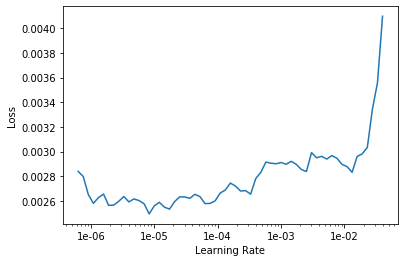

In [19]:
# 我们也可以使用lr_find()找到损失仍在明显改善最高学习率
learn2.lr_find()
learn2.recorder.plot()

In [20]:
# Suppose you got the good lr = le-06
lr = 1e-06
learn.fit_one_cycle(1, lr)

epoch,train_loss,valid_loss,accuracy,time
0,0.005118,0.021436,0.994112,00:02


In [21]:
learn.fit_one_cycle(10,slice(1e-6,1e-4))

epoch,train_loss,valid_loss,accuracy,time
0,0.004820,0.021246,0.993621,00:02
1,0.004856,0.021176,0.993131,00:02
2,0.004787,0.021156,0.993131,00:02
3,0.004803,0.021157,0.993621,00:02
4,0.004788,0.021167,0.993621,00:02
5,0.004894,0.021156,0.993621,00:02
6,0.004761,0.021126,0.993621,00:02
7,0.004713,0.021102,0.993621,00:02
8,0.004789,0.021116,0.993621,00:02
9,0.004831,0.021145,0.993621,00:02
